# К ближайших соседей (KNN)

К ближайших соседей (k-nearest neighbors)  - алгоритм, который хранит данные и определяет класс для объекта по  схожести c другими, класс определяется по классам соседей.  

Посмотрим, как работает алгоритм на примере с вином. Рассмотрим 2 химических компонента: рутим и мирицетин. По измерению их уровней в вине напитки делятся на красное и белое вино. Так каждый напиток можно представить как точку с кординатами (уровень рутина; уровень мирицетина).

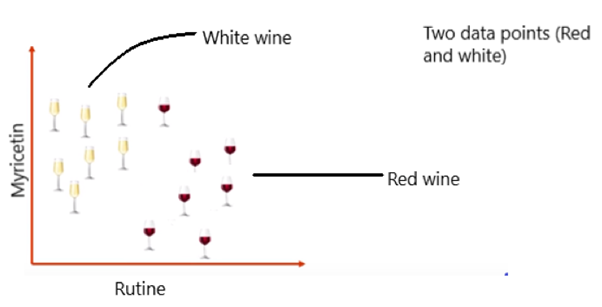


Допустим, для точек с вином на графике уже известно, красное оно или белое. Определим класс для новой точки, зная только значения уровня веществ.

Добавим новую точку на этот же график и определим тип(белое это или красное вино). Назовем это целевым признаком, то есть это то, что ищем.

Сделаем это при помощи KNN. Для этого выберем К ближайших к этой точке соседей(для этого нужно посчитать расстояние до других точек), посмотреть на значения их целевого признака и методом большинства решить, к какому классу относится это вино.

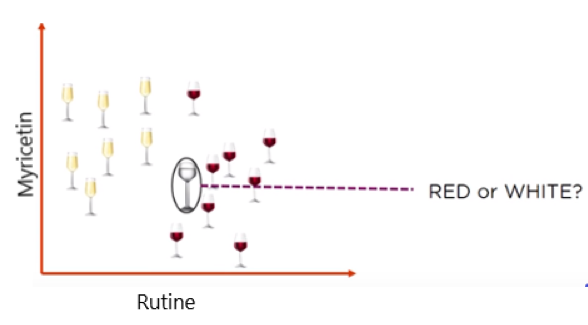

Возьмем k = 5 и посмотрим на ближайших соседей. 4 соседа из 5 - красное вино, значит и вино, добавленное как новая точка, тоже красное.


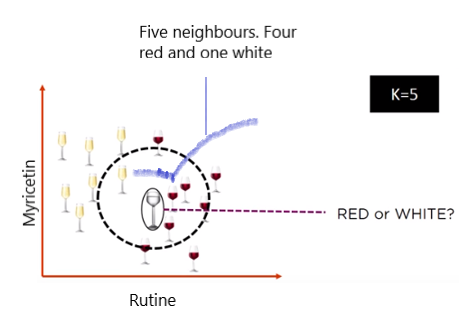





Мы определили к какому классу вина относится новая точка, то есть решили задачу классификации.

Теперь рассмотрим KNN подробнее и напишем его самостоятельно.


## K ближайших соседей kNN (Теория)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

kNN - это метрический алгоритм, предполагающий, что объекты одного класса в пространстве находятся близко друг к другу. В зависимости от выбора k - количества ближайших соседей и метрики расстояния, качество может сильно отличаться.

Алгоритм ленивый, то есть производит вычисления при предсказании, а не при обучении, тренировочную выборку хранит в себе. В примере с винами не было обучения, брали набор значений, новую точку и искали ее соседей в наборе. 

Идея алгоритма:
1. Взять новый объект и вычислить все расстояния по некоторой метрике от него до других объектов
2. Выбрать k ближайших соседей к этому объекту
3. Класс объекта - это класс наиболее часто встречающегося объекта среди k соседей.

В алгоритм можно внести изменение добавив веса для каждого объекта или класса. Например, при выборе класса смотрят не на большинство соседей, а на какую-то взвешенную сумму.

### Метод ближайших соседей в реальных задачах

- В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;
- В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
- Идея ближайшего соседа расширяется и на другие задачи, например, в рекомендательных системах простым начальным решением может быть рекомендация какого-то товара (или услуги), популярного среди ближайших соседей человека, которому хотим сделать рекомендацию;
- На практике для больших выборок часто пользуются приближенными методами поиска ближайших соседей. Вот лекция Артема Бабенко про эффективные алгоритмы поиска ближайших соседей среди миллиардов объектов в пространствах высокой размерности (поиск по картинкам). Также известны открытые библиотеки, в которых реализованы такие алгоритмы, спасибо компании Spotify за ее библиотеку Annoy.

### Качество классификации методом ближайших соседей зависит от нескольких параметров:

- число соседей
- метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100. То есть алгоритм страдает от *проклятия размерностей*.
- веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

### Метрики расстояния

Для поиска ближайших соседей используется расстояние, однако оно может быть разным, в зависимости от того, какую метрику использовать

Аксиомы метрики:

1. $\rho(x,y) \ge 0$
2. $\rho(x,y) = \rho(y,x)$
3. $\rho(x,y) \ge \rho(x,z) + \rho(z,y)$

#### Евклидова метрика

$\large \rho(x,y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$

#### Манхэттенская метрика

$\large \rho(x,y) = \sum_{i=1}^{n}{|x_i - y_i|}$

####  Минковского метрика

$\large \rho(x,y) = {(\sum_{i=1}^{n}{|x_i - y_i| ^ q})} ^ \frac{1}{q}$

#### Косинусная метрика

$\large \rho(x,y) = \arccos(\frac{\langle{x,y}\rangle}{\|x\|\|y\|}) = \arccos{\frac{\sum^d_{i=1}{x_i y_i}}{(\sum^d_{i=1}{x_i^2})^{1/2}(\sum^d_{i=1}{y_i^2})^{1/2}}}$

![](https://i.imgur.com/0aBH1bO.png)

### Масштаб признаков 

Исходя из формулы метрики расстояния между объектами в пространстве, можно сделать вывод, что масштаб признаков определяет их значимость. Например, умножим один из признаков на константу C. Тогда Евклидово расстояние примет вид: $$p_2(x,y) = \sqrt{C(x_1-y_1)^2+\sum_{i=2}^{d}{(x_i-y_i)^2}}$$ Таким образом, различие по первому признаку будет считаться в C раз более значимым, чем различия по всем остальным признакам. При этом расположение объектов относительно друг друга не изменилось - изменился лишь масштаб!

Если мы возьмем задачу, в которой измеряется рост в сантиметрах и вес в килограммах людей, и будем на этих данных предсказывать что-то, то рост будет всегда иметь большую важность, чем вес.  
Чтобы избежать проблему масштаба, признаки нужно нормировать. Это можно делать следующими способами: 

- Нормировка на единичную дисперсию: $\widetilde{x} = \frac{x - \overline{x}}{\sigma(x)}$
- Нормировка на отрезок [0,1]: $\widetilde{x} = \frac{x - min(x)}{max(x) - min(x)}$

### Проклятие размерности

Проблема заключается в невозможности эффективного поиска ближайших соседей для заданной точки в многомерном пространстве. Это происходит из-за того, что все объекты выборки равномерно распределены по d-мерной сфере и равноудалены друг от друга. Например, для kNN для 5 соседей и 5000 объектов в выборке размерность должна быть не больше 10, чтобы решение было более менее эффективным. 

Подробнее об этом прочитайте в материалах к [Семинарам по машинному обучению, ВМК МГУ](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem02_knn.pdf).

![](https://i.imgur.com/VZkE79X.png)

$\LARGE \lim_{n \rightarrow \infty}{0.99^n} = 0$

## Практика

### Классификация

Реализуем собственный KNN, проверим его работу на точках и датасете с цифрами


Для начала запустите ячейки с кодом ниже. В ячейках будут комментарии с пояснениями к коду

In [ ]:
# для начала импортируем модули, которые понадобятся нам для написание классификатора 
# numpy - библиотека для работы с массивами(матрицами в том числе), помогает делать различные операции над ними
import numpy as np
# matplotlib, seaborn понадобятся для рисования графиков, отображения изображений
from matplotlib import pyplot as plt
import seaborn as sns

# с помощью этой команды графики будут отображаться в текущем окне в ноутбуке под ячейкой, где написан код для отображения графика 
%matplotlib inline

# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=42)

Сгененируем точки для трех классов, у каждого класса 50 точек, каждая из которых имеет 2 координаты. 

Будем для этого использовать [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) и добавим еще одну 

Добавим еще точку `point`, позже определим ее класс

Первый класс имеет синий цвет на графике, второй - оранжевый, третий - зелёный.



In [ ]:
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=10, scale=0.8, size=(50,2)) - np.array([5, -5])


X = np.concatenate((p1, p2, p3))
y = np.array([1]*50 + [2]*50 + [3]*50)

point = [2, 2.5]

plt.scatter(p1[:,0], p1[:, 1], color='blue')
plt.scatter(p2[:,0], p2[:, 1], color='orange')
plt.scatter(p3[:,0], p3[:, 1], color='green')
plt.scatter(point[0], point[1], s = 100, color='red')

Реализуем kNN самостоятельно. Нам будет достаточно написать функцию вычисления результирующего класса. 

**Вопрос:** почему не нужно реализовывать этап обучения алгоритма? и есть ли он?




# Задание 1

Начнем с метрик. Предлагаем Вам сделать так, чтобы метрику можно было менять. Проще всего сделать её аргументом функции, для этого замените `pass` на Ваш код

Попробуем начать с функций 
Функция в python - объект, принимающий аргументы и возвращающий значение. Обычно функция определяется с помощью инструкции def.

Прочитать как использовать функции и посмотреть примеры можно [тут](https://www.w3schools.com/python/python_functions.asp) и [тут, но на русском](https://pythonworld.ru/tipy-dannyx-v-python/vse-o-funkciyax-i-ix-argumentax.html)

**Подсказка**: для начала нужно будет дописать `euclidian_metric(a, b)`.
Всё, что нужно сделать - это вернуть значение формулы

$\large \rho(x,y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$


Так как мы работаем с массивами, то будем использовать numpy. Что нужно использовать:

[np.power()](https://numpy.org/doc/stable/reference/generated/numpy.power.html), [np.sqrt()](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html), [np.sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

Чтобы понять, как работает каждая функция читайте документацию, там приводятся примеры использования

**Подсказка 2**: обратите внимание на axis в сумме `np.sum()`, ниже есть ячейка с кодом, которая показывает разницу между разными значениями этого параметра, для вычисления нормы вам нужна сумма по строкам.


In [ ]:
def euclidian_metric(a, b):  # реализуем Евклидову метрику через норму
     #############
     #  ВАШ КОД  #
     #############

In [ ]:
# запустим эту ячейку, чтобы проверить, всё ли верно реализовано на текущем этапе
# если возникает ошибка в assert, то при реализации функций была допущена ошибка
# если появляется текст из print - на данном этапе ошибок нет
a = np.zeros((1,4))
b = np.ones((1,4))

assert euclidian_metric(a,b)[0] == 2
print('ошибок нет')

In [ ]:
# Пример, показывающий разницу между axis
array = [[1,2,3],[1,2,3],[1,2,3]]
print('Сумма при axis = 0: {0}'.format(np.sum(array, axis = 0)))
print('Сумма при axis = 1: {0}'.format(np.sum(array, axis = 1)))

Далее реализуем функции, необходимые нам для вычисления класса по методу ближайших соседей.

# Задание 2.1

Напишите функцию, которая по уже рассчитанным расстояниям от точек `y` до нашей точки (`distances`) находит и возвращает `k` ближайших соседей и соответствующие расстояния до них.

In [ ]:
def _find_neighbours(k, y, distances):
    #############
    #  ВАШ КОД  #
    #############
    return neighbours, neighbours_distances

**Справка по питону**

На вход подается расстояния `distances` от текущей точки(класс которой нужно определить) до точек в пространстве.
1)Нужно взять k точек с наименьшим расстоянием

2) и посмотреть, к какому классу они относятся

Для 1) используйте np.argsort - вернет отсортированные по значениям старые индексы 

Для 2): получаем из `у` классы по отсортированным в 1) значениям и берем первые к к элементов (ближайших к соседей)

Аналогично делаем с растояниями до этих соседей

In [ ]:
# как можно брать значения из некоторых структур данных для хранения объектов. 
# чтобы узнать больше читайте про slice(срезы) в python
array = np.array([12,0,3,2,5,1,1])
#array[начало:конец:шаг]
print(array[3:])  # элементы с третьего
print(array[:3])  # элементы до третьего
print(array[2::2])  # каждый 2 элемент начиная со второго элемента
args = np.array([2,1,3])
print(array[args]) # берем второй, первый и третий элемент

In [ ]:
# еще можно использовать маски
print(array[array < 3])  # берем все элементы списка меньше 3
print(array[array == 1])  # все элементы массива равные 1

# маска передается в виде значений True/False, например,
print(array < 3)

# еще можно передавать индексы массивом 
ind = [1,2,5]
print(array[ind])


Статью с примерами использования индексов, масок и срезов можно почитать [здесь](https://junaidsqazi.medium.com/a6-numpy-part-2-indexing-slicing-broadcasting-fancy-indexing-boolean-masking-universal-d85610eccfe7). 

Код представлен в виде скриншотов:(

In [ ]:
Y = np.arange(10)
dist = np.linspace(1, 10, 10)
neighbours = find_neighbours(3, Y, dist)  
real_neighbours = ([0, 1, 2], [1., 2., 3.])
for i in range(len(neighbours)):
    for j in range(len(neighbours[i])):
        assert neighbours[i][j] == real_neighbours[i][j]
print('Если вы видите этот текст, но не видите ошибку, то всё работает корректно!')

# Задание 2.2

Реализуйте функцию, выделяющую преобладающий класс среди соседних объектов. Если есть конкурирующие классы, то нужно вернуть их все.

Конкурирующими считаются те классы, для которых количество принадлежащих им объектов равно между собой и при этом наибольшее среди всех классов, представленных в подвыборке.

**Hint:**  

1.   используйте `np.unique` и return_counts, чтобы узнать, сколько раз встречалось каждое значение
2.   среди счетчиков найдите максимальное значение
3. по этому максимальному значению верните все классы, для которых значение счетчика соответствует максимуму (используйте маски)


In [ ]:
def _get_closest_classes(neighbours):
    #############
    #  ВАШ КОД  #
    #############
    return best_classes

In [ ]:
# sanity check
assert get_closest_classes(np.asarray([1,2,3,2,2])) == [2]
closest = get_closest_classes(np.asarray([1,2,3,2,3]))
assert closest[0] == 2 and closest[1] == 3
print('get_closest_classes работает верно')

get_closest_classes работает верно


# Задание 2.3

Напишите функцию, которая выбирает наиболее подходящий класс, при условии, что есть несколько конкурирующих классов. 

Для этого будет необходимо посчитать среднее расстояние до объектов каждого класса и выбрать класс с наименьшим таким расстоянием.

In [ ]:
def _choose_best_class(best_classes, neighbours, neighbouring_distances):
    min_mean_dist = np.inf
    best_class = None

    #############
    #  ВАШ КОД  #
    #############

    return best_class

In [ ]:
# sanity check
assert choose_best_class([1,2], np.array([1, 2, 1, 3, 2]), np.asarray([0.5, 1, 1, 8, 0.6])) == 1
print('Проверка пройдена')

Далее нужно реализовать функцию, делающую предсказание для одной точки, используя реализованные ранее функции.

In [ ]:
# эта функция будет считать расстояния каждой точки элемента выборки x_pred до всех точек 
# в исходном датасете X и на основе расстояний вычислять принадлежность к классу

def nearest_neighbours_classify(x, y, k, x_pred):
    res = np.zeros(x_pred.shape[0], dtype=y.dtype)

    for i in range(x_pred.shape[0]):
        distances = euclidian_metric(x, x_pred[i])  # считаем расстояния до классов

        neighbours, neighbouring_distances = find_neighbours(k, y, distances)  # находим ровно k соседей этой точки
            
        best_classes = get_closest_classes(neighbours)  # обнаруживаем классы, которые имеются среди соседей

        res[i] = choose_best_class(best_classes, neighbours, neighbouring_distances)  # выбираем наиболее релевантный класс по среднему расстоянию до него среди соседей
    return res

Запустим в лоб наш классификатор kNN и посмотрим, какое качество он нам выдаст. Воспользуемся `train_test_split`, чтобы разбить данные на тренировочную и валидационную выборки.

train_test_split используется, чтобы разбить данные на 2 части разного размера, по одной будем обучать, а вторую используем, чтобы проверить, насколько хорошо работают предсказания (используем один раз после конца обучения).

Модель просто запомнит значения целевого признака для каждого набора значений,если использовать одни данные для тренировки и проверки. Такая модель не сможет нормльно предсказывать значения для данных не из выборки.

В у лежит целевой признак, в Х - данные, по которым будем предсказывать значение целевого признака

Подробнее можно почитать по [ссылке1](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) и [ссылке2](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)


`accuracy_score` - это доля верных ответов алгоритма: после предсказания получаем y_pred и смотрим, сколько значений совпало с реальным значением `y`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split разбивает X и y на выборки при этом размер тестовой выборки устанавливается через test_size  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# выберем число соседей =  5
# для данных из тестовой выборки предскажем, к какому классу относятся точки
y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

#а теперь сравним предсказанное значение с реальным и выведем значение, показывающее процент верно классифицированных
#(значение будет от 0 до 1 - от 0 до 100 процентов соответственно)
print(accuracy_score(y_test, y_pred))

Теперь определим класс для точки `point`. Мы добавили ее в самом начале.

In [ ]:
point = np.array([point]) # изначально точка добавлялась на график как список, но мы работает с numpy массивами
nearest_neighbours_classify(X_train, y_train, 5, point)[0]

## **MNIST**

Посмотрим, как работает KNN на рукописных цифрах, будем определять цифру по картинке 8х8

В этом случае используются уже не два значения, как это было для точки, а 64 (см. размер картинки). 
Каждое отвечает за значение цвета в пикселе, его цвет может быть от белого до черного. У одинаковых цифр будут близкие значения в каждой координате массива 8х8. 


In [ ]:
from sklearn import datasets

# загружаем датасет с цифрами
# В Х загрузим картинки с цифрами, по Х предсказываем класс
# В y хранится значение целевого признака, что мы должны предсказать в итоге. 
X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

In [ ]:
# выведем пример содержимого датасета с помощью кода ниже(10 цифр)
# Для начала зафиксируем размер итоговой фигуры(на нее будем добавлять изображения с цифрами)
plt.figure(figsize=(16, 6))
width = int(np.sqrt(X.shape[1]))
# Затем в цикле будем добавлять изображения на фигуру, используя функцию subplot, 
# она нужна для добавления независимых графиков\изображений на одной ячейке
# первое значение в subplot обозначает число строк, второе - число столбцов,
# то есть так можно добавить на график 5 в каждую строку, всего 2 строки
# Третье значение отвечает за текущую позицию(нумерация с 1), например, если позиция 6, то картинка добавится в первый столбец второго ряда(для текущих значений) 
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([width,width]), cmap='gray')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

print(accuracy_score(y_test, y_pred))

### Бонусная секция
Теперь нарисуем и классифицируем число

С помощью кода ниже можете нарисовать и  классифицировать свою цифру.

**Спойлер:** результат предсказания может быть плохим: предсказываем цифру с изображения 8х8. Размер картинки довольно маленький, к тому же люди часто пишут цифры по-разному $-$ в мнисте это не предусмотрено (7 в мнисте очень похожа на 1, а вот написание 0 и 8 у людей обычно не сильно различается)

In [ ]:
# код, который делает магию и дает возможность рисовать в колабе
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="width: 160px; height: 160px"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = (e.pageX - this.offsetLeft)/10
  mouse.y = (e.pageY - this.offsetTop)/10
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=16, h=16, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [ ]:
# запустите эту ячейку, нарисуйте цифру.
# когда закончите, нажмите Finish
# рисовать нужно левее кнопки
draw(w=16, h=16, line_width=1)

267

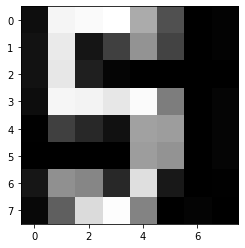

In [ ]:
#поменяем размер изображения и сделаем его похожим на мнист

from PIL import Image

img = Image.open('drawing.png')

r = img.resize((8,8), Image.ANTIALIAS)
red, green, blue, alpha = r.split()

image_array = np.array(alpha).reshape((1, 64))
plt.imshow(image_array.reshape([8,8]), cmap='gray')

In [ ]:
y_pred = nearest_neighbours_classify(X_train, y_train, 5, image_array)
print('Это цифра ', y_pred[0])

Это цифра  5
